In [1]:
# Import neccesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import openpyxl
import seaborn as sns

In [2]:
df = pd.read_excel('Student-Employability-Datasets.xlsx')

In [3]:
df.head(2)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [5]:
df.shape

(2982, 10)

In [6]:
# For uniformity, change all column headers to uppercases
df.columns = df.columns.str.upper().str.replace(" ", "_")
# Map the CLASS column value to either 1 or 0
class_mapping = {'Employable':1, 'LessEmployable':0}
df['CLASS']=df['CLASS'].map(class_mapping)

In [7]:
df.head(2)

,NAME_OF_STUDENT,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1
1,Student 2,4,4,4,4,4,4,3,5,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME_OF_STUDENT             2982 non-null   object
 1   GENERAL_APPEARANCE          2982 non-null   int64 
 2   MANNER_OF_SPEAKING          2982 non-null   int64 
 3   PHYSICAL_CONDITION          2982 non-null   int64 
 4   MENTAL_ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY_TO_PRESENT_IDEAS    2982 non-null   int64 
 7   COMMUNICATION_SKILLS        2982 non-null   int64 
 8   STUDENT_PERFORMANCE_RATING  2982 non-null   int64 
 9   CLASS                       2982 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 233.1+ KB


In [9]:
#Standardization
df = df.drop(columns=['NAME_OF_STUDENT'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
corr = np.corrcoef(df_norm)
corr

array([[ 1.        ,  0.10482848, -0.23759548, ...,  0.47809144,
        -0.21821789,  0.10482848],
       [ 0.10482848,  1.        ,  0.42341516, ...,  0.61394061,
         0.08006408,  0.65384615],
       [-0.23759548,  0.42341516,  1.        , ...,  0.14199046,
         0.82956136,  0.19925419],
       ...,
       [ 0.47809144,  0.61394061,  0.14199046, ...,  1.        ,
        -0.18257419,  0.61394061],
       [-0.21821789,  0.08006408,  0.82956136, ..., -0.18257419,
         1.        , -0.16012815],
       [ 0.10482848,  0.65384615,  0.19925419, ...,  0.61394061,
        -0.16012815,  1.        ]])

In [10]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
df_norm = pd.DataFrame(df_norm)
X = df_norm.iloc[:, :-1]
Y = df_norm.iloc[:, -1]

In [11]:
#split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=50)
# Create an instance of logistic regression class
logreg = LogisticRegression()
# Create Grid Seacrh Object
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}  
grid_search = GridSearchCV(logreg, parameters, cv=10) 
# Fit the grid model to the training data
logreg_cv = grid_search.fit(X_train, Y_train)
print('hypertuned parameters: (best parameters) ', logreg_cv.best_params_)
print('accuracy: ', logreg_cv.best_score_)
# Make predictions on the test data 
Yhat = logreg_cv.predict(X_test)
Yhat[0:20]

hypertuned parameters: (best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.6170156599552572


array([0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1.])

In [24]:
# OBJECTIVE 2
# Get the feature names from the column names
feature_names = X.columns
# Get the coefficients of the logistic regression model
coef = logreg_cv.best_estimator_.coef_[0]
# Zip the feature names with the coefficients into a list of tuples
coef_list = list(zip(feature_names, coef))
# Print the feature names and their corresponding coefficients
for feature, coef in coef_list:
    print(feature, coef)

0 0.02750680024637928
1 1.4398676661718148
2 0.2654316307482703
3 1.3392791568342113
4 -0.062260550949275115
5 -0.9602724172493071
6 0.12872471567776567
7 -0.058288113613523033


Accuracy Score: 0.61
Confusion Matrix: 
 [[253 375]
 [200 663]]


<AxesSubplot: >

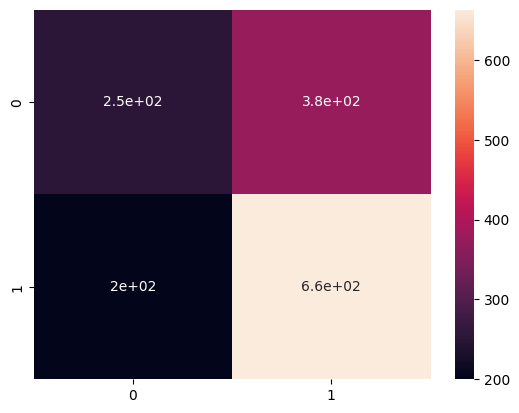

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accurracy score
acc = accuracy_score(Y_test, Yhat)
print('Accuracy Score: %.2f'% acc)
# Confusion Matrix
Cmat = confusion_matrix(Y_test, Yhat)
print('Confusion Matrix: \n', Cmat)
# plot confusion_matrix
sns.heatmap(Cmat, annot=True)

In [13]:
from sklearn.metrics import classification_report, roc_auc_score
# Classification report
class_report = classification_report(Y_test, Yhat)
print("Classification Report: \n", class_report)
# AUC-ROC score
Yhat_proba = logreg_cv.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(Y_test, Yhat_proba)
print("AUC-ROC Score: ", auc_roc)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.56      0.40      0.47       628
         1.0       0.64      0.77      0.70       863

    accuracy                           0.61      1491
   macro avg       0.60      0.59      0.58      1491
weighted avg       0.60      0.61      0.60      1491

AUC-ROC Score:  0.6128765010222081


In [14]:
#K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of your K Nearest Neighbour Class
knn = KNeighborsClassifier()
# Create a grid search object
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
grid_search= GridSearchCV(knn, parameters, cv=10)
# Fit the model on the training data
knn_cv = grid_search.fit(X_train, Y_train)
print('hypertuned parameters: (best parameters) ', knn_cv.best_params_)
print('accuracy: ', knn_cv.best_score_)
# Make predictions on the test data 
Yhat = knn_cv.predict(X_test)
Yhat[0:20]

hypertuned parameters: (best parameters)  {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1}
accuracy:  0.9108322147651007


array([0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1.])

Accuracy Score: 0.90
Confusion Matrix: 
 [[547  81]
 [ 66 797]]


<AxesSubplot: >

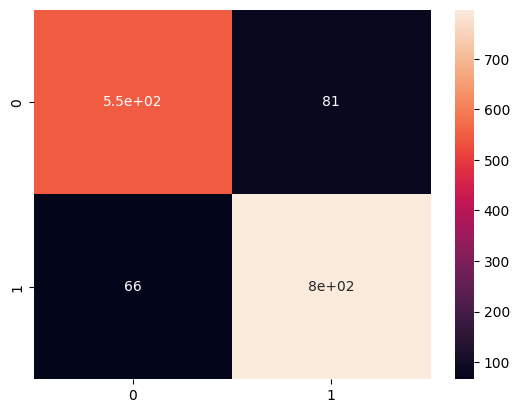

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accurracy score
acc = accuracy_score(Y_test, Yhat)
print('Accuracy Score: %.2f'% acc)
# Confusion Matrix
Cmat = confusion_matrix(Y_test, Yhat)
print('Confusion Matrix: \n', Cmat)
# plot_confusion_matrix
sns.heatmap(Cmat, annot=True)

In [16]:
from sklearn.metrics import classification_report, roc_auc_score
# Classification report
class_report = classification_report(Y_test, Yhat)
print("Classification Report: \n", class_report)
# AUC-ROC score
Yhat_proba = knn_cv.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(Y_test, Yhat_proba)
print("AUC-ROC Score: ", auc_roc)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       628
         1.0       0.91      0.92      0.92       863

    accuracy                           0.90      1491
   macro avg       0.90      0.90      0.90      1491
weighted avg       0.90      0.90      0.90      1491

AUC-ROC Score:  0.9626700297436731


In [17]:
#Decision Tree Clasifier
from sklearn.tree import DecisionTreeClassifier
# Create an instance of Decision Tree Object
tree = DecisionTreeClassifier()
# Create a grid object
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
grid_search= GridSearchCV(tree, parameters, cv=10)
# Fit the model to the training set
tree_cv = grid_search.fit(X_train, Y_train)
print('hypertuned parameters: (best parameters) ', tree_cv.best_params_)
print('accuracy: ', tree_cv.best_score_)
# Make predictions on the test data
Yhat = tree_cv.predict(X_test)
Yhat[0:20]

hypertuned parameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy:  0.91213870246085


array([0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1.])

In [18]:
# OBJECTIVE 4 & 6
# Method that performed best
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.6143527833668678
Accuracy for Decision tree method: 0.898054996646546
Accuracy for K nearest neighbors method: 0.9014084507042254


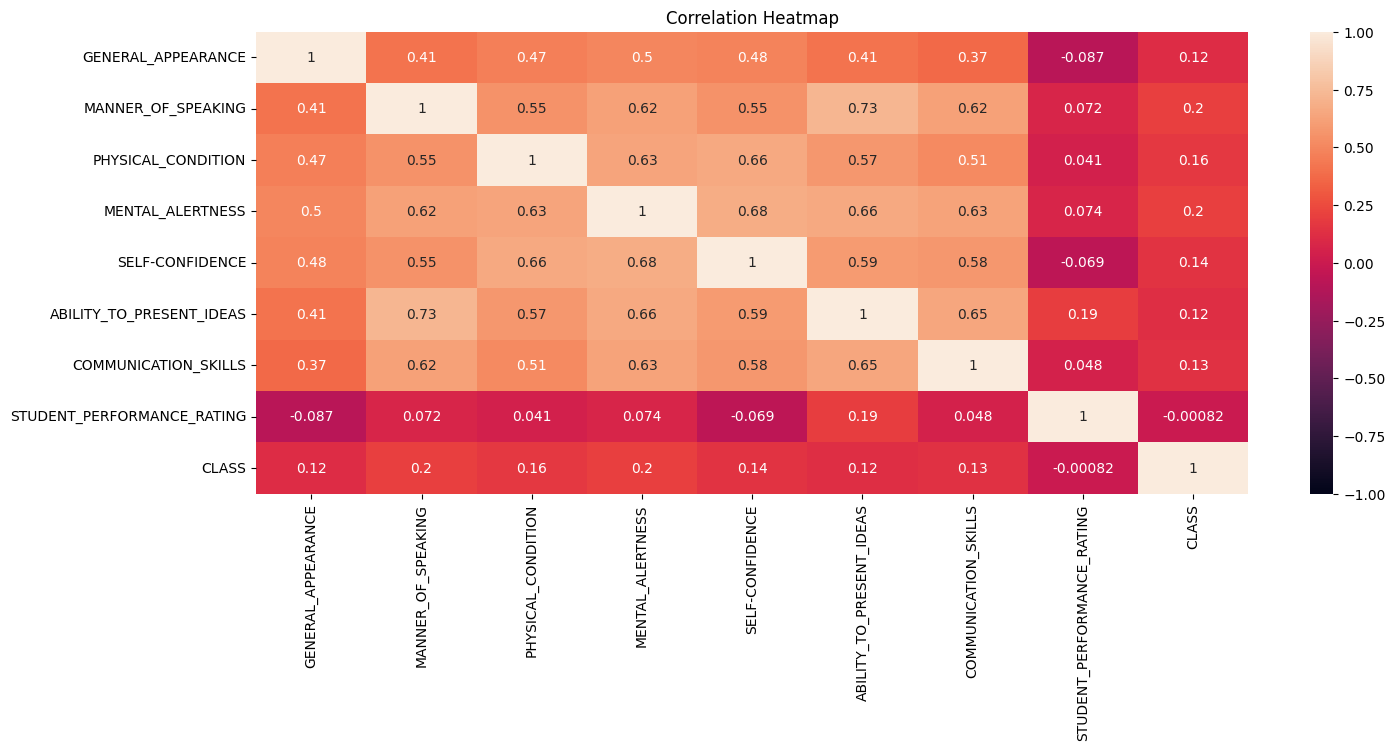

In [20]:
# OBJECTIVE 1

# Plot matrix
plt.figure(figsize=(16, 6))
plt.title("Correlation Heatmap")
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

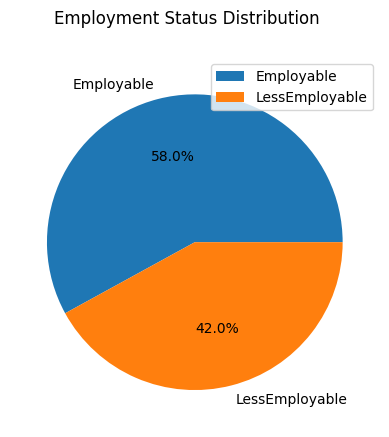

In [ ]:
# OBJECTIVE 3
#Pie Chart
# Count the number of observations
class_counts = df['CLASS'].value_counts()
class_counts
# Plot the pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.legend(['Employable', 'LessEmployable'])
plt.suptitle('Employment Status Distribution')
# plt.rcParams.update({'font.size':16})
plt.show()